## Задания к видеоуроку "Элементы теории вероятностей"

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np

def roulette(n):
    for itr in range(n):
        print(np.random.randint(0, 37))
    
roulette(5)

18
10
36
12
19


2. 
Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.
Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9

In [2]:
def one_event_roulette(n):
    
    itr = 0
    
    for _ in range(n):
        x = np.random.randint(0, 37)
        if x==0:
            itr += 1

    return itr/n

        
def two_event_roulette(n):
    
    itr = 0
    a = False
    
    for _ in range(n):
        x = np.random.randint(0, 37)
        
        if x==0 and a:
            itr += 1
            a = False
        elif x==0:
            a = True
        else:
            a = False
            
    return itr/n


one = one_event_roulette(100000)
two = two_event_roulette(100000)
print(f"Вероятность выпадения зеро один раз: {one}")
print(f"Вероятность выпадения зеро два раза подряд: {two}")
print(f"Вероятность произведения двух независимых событий A и B равна произведению этих вероятностей:")
print(f"{two} =~ {one} * {one}")

Вероятность выпадения зеро один раз: 0.02602
Вероятность выпадения зеро два раза подряд: 0.00069
Вероятность произведения двух независимых событий A и B равна произведению этих вероятностей:
0.00069 =~ 0.02602 * 0.02602


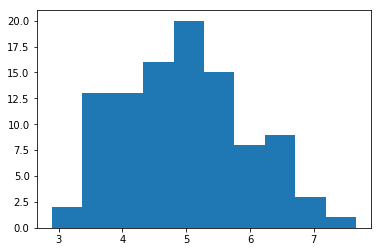

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

x = []
for _ in range(10):
    x.append(np.random.rand(100))
plt.hist(sum(x), 10);

3.
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.
Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [4]:
import math


def binom_p(k, n, p):
    
    q = 1 - p
    c = (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))
    return c, c*p**k*(1-q)**(n-k)


print(f'При k=2, n=4 ---> C={binom_p(2, 4, 0.5)[0]}, P={binom_p(2, 4, 0.5)[1]}')
print(f'При k=5, n=10 ---> C={binom_p(5, 10, 0.5)[0]}, P={binom_p(5, 10, 0.5)[1]}')
print(f'При k=7, n=10 ---> C={binom_p(7, 10, 0.5)[0]}, P={binom_p(7, 10, 0.5)[1]}')
print(f'При k=1, n=12 ---> C={binom_p(1, 12, 0.5)[0]}, P={binom_p(1, 12, 0.5)[1]}')

При k=2, n=4 ---> C=6.0, P=0.375
При k=5, n=10 ---> C=252.0, P=0.24609375
При k=7, n=10 ---> C=120.0, P=0.1171875
При k=1, n=12 ---> C=12.0, P=0.0029296875


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [5]:
import itertools

for p in itertools.permutations('0124', 3):
    print(''.join(str(x) for x in p))

012
014
021
024
041
042
102
104
120
124
140
142
201
204
210
214
240
241
401
402
410
412
420
421


In [6]:
perm = 0
for p in itertools.permutations('01234', 3):
    perm += 1
print('Количество перестановок =', perm)


perm = 0
for p in itertools.permutations('0123456789', 5):
    perm += 1
print('Количество перестановок =', perm)


perm = 0
for p in itertools.permutations('0123456', 6):
    perm += 1
print('Количество перестановок =', perm)

Количество перестановок = 60
Количество перестановок = 30240
Количество перестановок = 5040


0.6874930484138578 0.15232768392400586
0.6874930484138586 0.15232768392400534
0.9011625012400488
0.9011625012400488


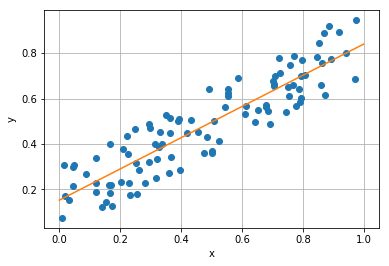

In [7]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)**2 - n*np.sum(x**2))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]

R = (np.sum((x - np.mean(x))*(y - np.mean(y))))/(np.sqrt(np.sum((x - np.mean(x))**2)*np.sum((y - np.mean(y))**2)))

print(a, b)
print(a1, b1)
print(R)
print(np.corrcoef(x, y)[0, 1])

plt.plot([0, 1], [b, a + b])
plt.show();